In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns


In [3]:
df = pd.read_csv('/kaggle/input/identifythedanceform/dataset/train.csv')
df.head(10)

,Image,target
0,96.jpg,manipuri
1,163.jpg,bharatanatyam
2,450.jpg,odissi
3,219.jpg,kathakali
4,455.jpg,odissi
5,46.jpg,kathak
6,326.jpg,sattriya
7,408.jpg,kuchipudi
8,365.jpg,sattriya
9,422.jpg,kuchipudi


In [4]:
df['target'].unique()

array(['manipuri', 'bharatanatyam', 'odissi', 'kathakali', 'kathak',
       'sattriya', 'kuchipudi', 'mohiniyattam'], dtype=object)

In [5]:
df.isna().sum()


Image     0
target    0
dtype: int64

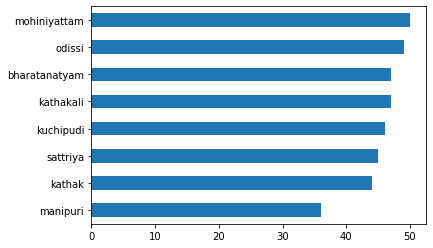

In [6]:
df.target.value_counts().sort_values().plot(kind = 'barh')


In [7]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# import os
# for each in os.listdir('/kaggle/input/identifythedanceform/dataset/train/'):
#     img=mpimg.imread('/kaggle/input/identifythedanceform/dataset/train/'+ each)
#     imgplot = plt.imshow(img)
#     plt.show()


In [8]:

from fastai import *
from fastai.vision import *

In [9]:
tfms = get_transforms()


In [10]:
path = '/kaggle/input/identifythedanceform/dataset/'
sz = 32
data = ImageDataBunch.from_csv(path, folder = 'train', csv_labels = "train.csv",test='test'
                                ,size=400,valid_pct=0.05,bs=20,
                               ds_tfms = tfms)
#data.path = pathlib.Path('.')
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (346 items)
x: ImageList
Image (3, 400, 400),Image (3, 400, 400),Image (3, 400, 400),Image (3, 400, 400),Image (3, 400, 400)
y: CategoryList
manipuri,bharatanatyam,odissi,kathakali,odissi
Path: /kaggle/input/identifythedanceform/dataset;

Valid: LabelList (18 items)
x: ImageList
Image (3, 400, 400),Image (3, 400, 400),Image (3, 400, 400),Image (3, 400, 400),Image (3, 400, 400)
y: CategoryList
kathakali,kathakali,mohiniyattam,manipuri,mohiniyattam
Path: /kaggle/input/identifythedanceform/dataset;

Test: LabelList (156 items)
x: ImageList
Image (3, 400, 400),Image (3, 400, 400),Image (3, 400, 400),Image (3, 400, 400),Image (3, 400, 400)
y: EmptyLabelList
,,,,
Path: /kaggle/input/identifythedanceform/dataset

In [11]:
data.train_ds


LabelList (346 items)
x: ImageList
Image (3, 400, 400),Image (3, 400, 400),Image (3, 400, 400),Image (3, 400, 400),Image (3, 400, 400)
y: CategoryList
manipuri,bharatanatyam,odissi,kathakali,odissi
Path: /kaggle/input/identifythedanceform/dataset

In [12]:
data.classes


['bharatanatyam',
 'kathak',
 'kathakali',
 'kuchipudi',
 'manipuri',
 'mohiniyattam',
 'odissi',
 'sattriya']

In [13]:
from fastai.metrics import error_rate,accuracy # 1 - accuracy
learn = cnn_learner(data, models.densenet169, metrics=[error_rate,accuracy], callback_fns=ShowGraph)

Downloading: "https://download.pytorch.org/models/densenet169-b2777c0a.pth" to /root/.cache/torch/checkpoints/densenet169-b2777c0a.pth


In [14]:
learn.model_dir='/kaggle/working/'

In [15]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 2.09E-03
Min loss divided by 10: 4.79E-03


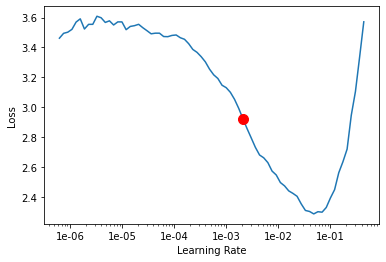

In [16]:
learn.recorder.plot(suggestion=True)

In [17]:
learn.recorder.__dict__

{'_learn': <weakref at 0x7f86e026ead0; to 'Learner' at 0x7f86e0201990>,
 'exclude': ['_learn'],
 'not_min': [],
 'opt': OptimWrapper over Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.99)
     eps: 1e-08
     lr: 1e-07
     weight_decay: 0
 
 Parameter Group 1
     amsgrad: False
     betas: (0.9, 0.99)
     eps: 1e-08
     lr: 1e-07
     weight_decay: 0
 
 Parameter Group 2
     amsgrad: False
     betas: (0.9, 0.99)
     eps: 1e-08
     lr: 1e-07
     weight_decay: 0
 
 Parameter Group 3
     amsgrad: False
     betas: (0.9, 0.99)
     eps: 1e-08
     lr: 1e-07
     weight_decay: 0
 
 Parameter Group 4
     amsgrad: False
     betas: (0.9, 0.99)
     eps: 1e-08
     lr: 1e-07
     weight_decay: 0
 
 Parameter Group 5
     amsgrad: False
     betas: (0.9, 0.99)
     eps: 1e-08
     lr: 1e-07
     weight_decay: 0
 ).
 True weight decay: True,
 'train_dl': DeviceDataLoader(dl=<torch.utils.data.dataloader.DataLoader object at 0x7f86e114a710>, device=device(type='cuda'

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,3.197387,1.772282,0.722222,0.277778,00:19
1,2.476112,0.942611,0.277778,0.722222,00:18
2,1.812115,0.654431,0.222222,0.777778,00:17
3,1.328769,0.549988,0.277778,0.722222,00:16
4,0.991510,0.662716,0.166667,0.833333,00:17
5,0.770102,0.848712,0.333333,0.666667,00:16
6,0.615823,0.593765,0.166667,0.833333,00:16
7,0.506484,0.400698,0.166667,0.833333,00:16
8,0.416284,0.307111,0.055556,0.944444,00:17
9,0.359651,0.322162,0.166667,0.833333,00:15


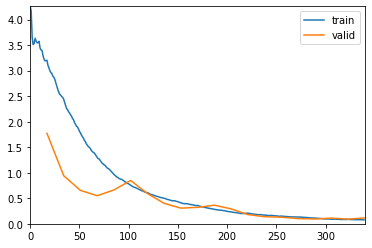

In [18]:
learn.fit_one_cycle(20, slice(learn.recorder.min_grad_lr))

In [19]:
log_preds, test_labels = learn.get_preds(ds_type=DatasetType.Test)


In [20]:
pred_labes = np.argmax(log_preds, 1)


In [21]:
output = [learn.data.classes[label] for label in pred_labes]


In [22]:
file_names = [str(item).split('/')[6] for item in learn.data.test_ds.items]


In [23]:
df_2 = pd.DataFrame({'Image':file_names,'target':output}, columns=['Image','target'])


In [24]:
df_2.head()


,Image,target
0,33.jpg,kathak
1,414.jpg,kuchipudi
2,11.jpg,kathak
3,217.jpg,kathakali
4,375.jpg,kuchipudi


In [25]:
df_2['target'].unique()

array(['kathak', 'kuchipudi', 'kathakali', 'mohiniyattam', 'sattriya', 'bharatanatyam', 'odissi', 'manipuri'],
      dtype=object)

In [26]:
df_2.to_csv('fastai.csv', index=False)